In [90]:
#  project :Second hand car price prediction 
# Firstly import necessary libraries.
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

# read data
df=pd.read_csv("car.csv")
df


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [91]:
df.isna().sum()   # Checks if there is null value. 
df=df.dropna()   # drop null values
df.reset_index(drop=True)    # reset index 


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [92]:
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [93]:
# Feature engineering :
df['seats'].value_counts()

seats
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [94]:
# torque : 
df['torque'] # here we cannot simplefy our column that we have to drop our column 
df=df.drop(columns=['torque'])
df

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8123,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8124,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8125,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [95]:
# max_power: split data into nums and chars
# first we ahve to remove bhp 
def fxn(x):
    return x.split()[0]
df['max_power']=df['max_power'].apply(fxn)   
df
# converting into data 
#df['max_power']=df['max_power'].astype('float32')
# find out the illegal values that are not convertable into float.
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except:
        index.append(i)
print(index)
 #  drop the illegal value index .
df=df.drop(index=index)
df=df.reset_index(drop=True)
# again convert column into float.


[840]


In [96]:
# # max_power: split data into nums and chars
# first we ahve to remove bhp 
def fxn(x):
    return x.split()[0]
df['max_power']=df['max_power'].apply(fxn)
df


# converting into float
#df['max_power']=df['max_power'].astype('float32') #error

# Find out illegal value that is not convertable into float
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-2])
    except: 
        index.append(i)
print(index)
#print(df.iloc[839])
# Drop the illegal value index
df=df.drop(index=index)
df=df.reset_index(drop=True)

# Again convert column into float 
#df['max_power']=df['max_power'].astype('float32')

[839]


In [97]:
# df['max_power'].unique


In [98]:
df['max_power']=df['max_power'].astype('float32')
df


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.849998,5.0
7900,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110.000000,5.0
7901,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.900002,5.0
7902,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70.000000,5.0


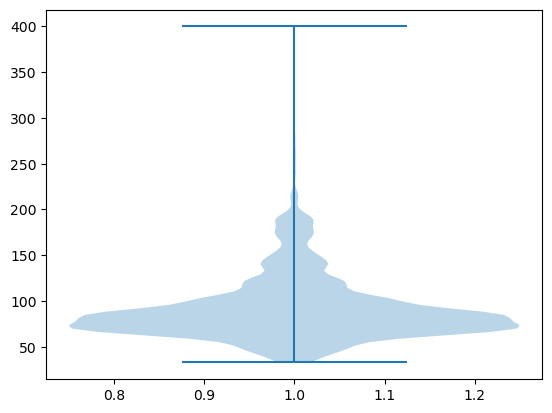

In [99]:
plt.violinplot(df['max_power'])
plt.show()

In [100]:
# engine colum : dosame thing on engine column 
def fxn(x):
    return x.split()[0]
df['engine']=df['engine'].apply(fxn)   
df
# converting into data 
#df['max_power']=df['max_power'].astype('float32')
# find out the illegal values taht is not convertable into float
index=[]
for i in range(len(df)):
    try:
        float(df.iloc[i,-3])
    except:
        index.append(i)
print(index)
 #  drop the illegal value index.
df=df.drop(index=index)
df=df.reset_index(drop=True)
# again convert colymn into flaot
df['engine']=df['engine'].astype('float32')
df


[967]


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396.0,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197.0,82.849998,5.0
7899,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493.0,110.000000,5.0
7900,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248.0,73.900002,5.0
7901,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396.0,70.000000,5.0


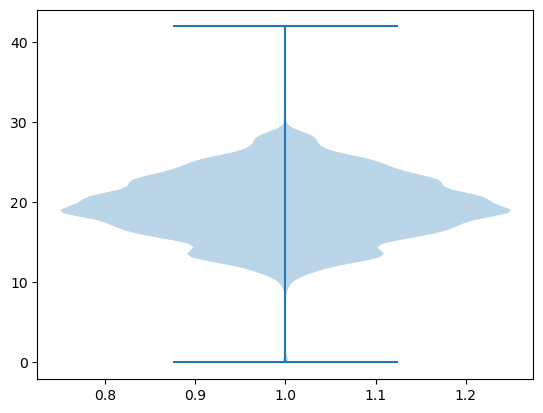

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,8122,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,5.0
7899,8123,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,5.0
7900,8124,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,5.0
7901,8125,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,5.0


In [101]:
# mileage 
def fxn(x):
    return x.split()[0]
df['mileage']=df['mileage'].apply(fxn)   


df['mileage']=df['mileage'].astype('float32')
plt.violinplot(df['mileage'])
plt.show()
df 

In [102]:
# Owner
df['owner'].value_counts()
df['owner']=df['owner'].replace({'Fifth':'Fourth & Above Owner'})
df['owner'].value_counts()

f=df['owner']== 'Test Drive Car'
df=df.drop(index=df[f].index)
df=df.reset_index(drop=True)
df['owner'].value_counts()



owner
First Owner             5214
Second Owner            2015
Third Owner              509
Fourth & Above Owner     160
Name: count, dtype: int64

[]

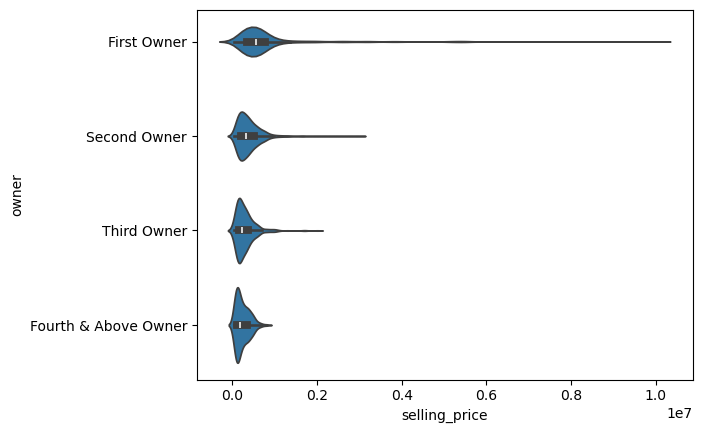

In [103]:
import seaborn 
seaborn.violinplot(data=df,x='selling_price',y='owner')
plt.plot()

In [104]:
# transmission
df['transmission'].value_counts()

transmission
Manual       6861
Automatic    1037
Name: count, dtype: int64

In [105]:
# seller tupe
df['seller_type'].value_counts()

seller_type
Individual          6560
Dealer              1102
Trustmark Dealer     236
Name: count, dtype: int64

[]

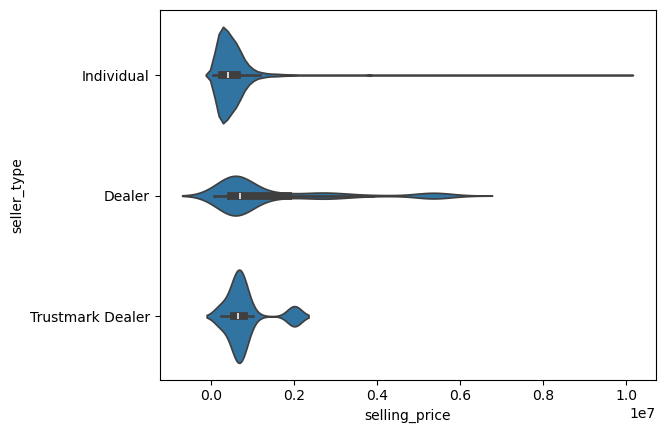

In [106]:
import seaborn 
seaborn.violinplot(data=df,x='selling_price',y='seller_type')
plt.plot()
# in graph we can see the distribution of three categories is different from each other #
# now this is ordinal column and label encoding is done

fuel
Diesel    4297
Petrol    3514
ECO         87
Name: count, dtype: int64

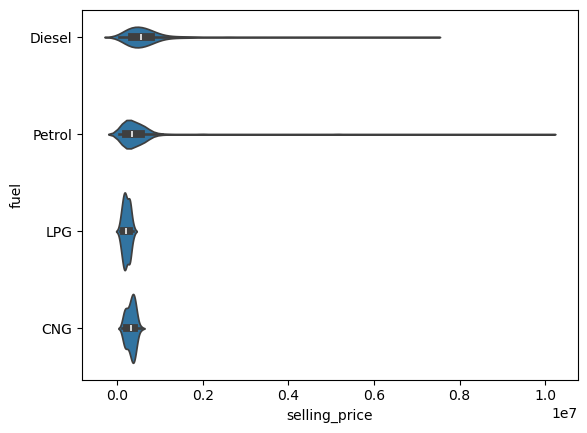

In [107]:
# fuel
df['fuel'].value_counts()
import seaborn 
seaborn.violinplot(data=df,x='selling_price',y='fuel')
plt.plot()
# by visualizition we ahve see that there is no impact of car as lgp or cng 
# s0 merge both categories into one
df['fuel']=df['fuel'].replace({'LPG':'ECO','CNG':'ECO'})
df['fuel'].value_counts()

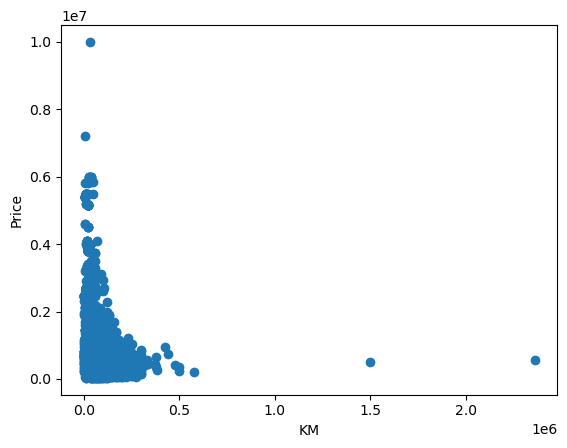

In [108]:
# km_deriven
plt.scatter(df['km_driven'],df['selling_price'])
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

In [134]:
# name column 
df['name'].value_counts()
# # when there  aree too many columns so dont apply one hot then merge categories
df['name']=df['name'].apply(lambda x:x.split()[0])
print(df['name'].value_counts()) # 31 categories

name
1    7168
2     426
0     304
Name: count, dtype: int64


In [137]:

# Name
# find average selling price of each 
groups=df.groupby('name')
prices=groups['selling_price'].mean()
prices=prices.sort_values(ascending=False)
print(prices)

# converting brands into 3 or 4 categories based on their average selling price
def fxn(x):
    if x in prices.index[0:10]:
        return 2   # expensive cars
    elif x in prices.index[10:25]:
        return 1   # family cars
    else:
        return 0   # low end cars  
df['name']=df['name'].apply(fxn)
#print(df['name'].value_counts())
        
        

name
2    647601.706381
Name: selling_price, dtype: float64


In [110]:
#  dt: 7 sep: task make two variables
#df=df.drop(columns=['Unnamed'])
Numeric=df[['year','selling_price','km_driven','mileage','engine','max_power','seats']]
category=df[['name','seller_type','fuel','transmission','owner']]


category['fuel']=category['fuel'].replace({'Petrol':0,'Diesel':1,'ECO':2})
category['seller_type']=category['seller_type'].replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
category['transmission']=category['transmission'].replace({'Manual':0,'Automatic':1})
category['owner']=category['owner'].replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3})
category

C:\Users\hp\AppData\Local\Temp\ipykernel_17712\1027146488.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  category['fuel']=category['fuel'].replace({'Petrol':0,'Diesel':1,'ECO':2})
C:\Users\hp\AppData\Local\Temp\ipykernel_17712\1027146488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['fuel']=category['fuel'].replace({'Petrol':0,'Diesel':1,'ECO':2})
C:\Users\hp\AppData\Local\Temp\ipykernel_17712\1027146488.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fu

,name,seller_type,fuel,transmission,owner
0,1,0,1,0,0
1,1,0,1,0,1
2,1,0,0,0,2
3,1,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7893,1,0,0,0,0
7894,1,0,1,0,3
7895,1,0,1,0,0
7896,1,0,1,0,0


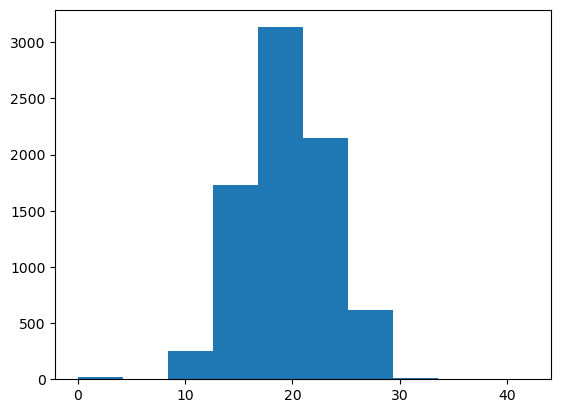

In [111]:
df['mileage']
plt.hist(df['mileage'])
plt.show()
#df['mileage'].std()
# 
#df['mileage'].skew()
#df['mileage'].kurt()

In [112]:
# pearson corelation test(independent and dependent in numerical form )
corr=Numeric.corr()   # it show relationship into positive and negative 
corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.412441,-0.428478,0.329211,0.017924,0.225522,-0.007321
selling_price,0.412441,1.000000,-0.221487,-0.124774,0.458123,0.750423,0.043331
km_driven,-0.428478,-0.221487,1.000000,-0.173533,0.207279,-0.036762,0.227627
mileage,0.329211,-0.124774,-0.173533,1.000000,-0.576260,-0.374074,-0.451881
engine,0.017924,0.458123,0.207279,-0.576260,1.000000,0.704215,0.611238
max_power,0.225522,0.750423,-0.036762,-0.374074,0.704215,1.000000,0.192647
seats,-0.007321,0.043331,0.227627,-0.451881,0.611238,0.192647,1.000000


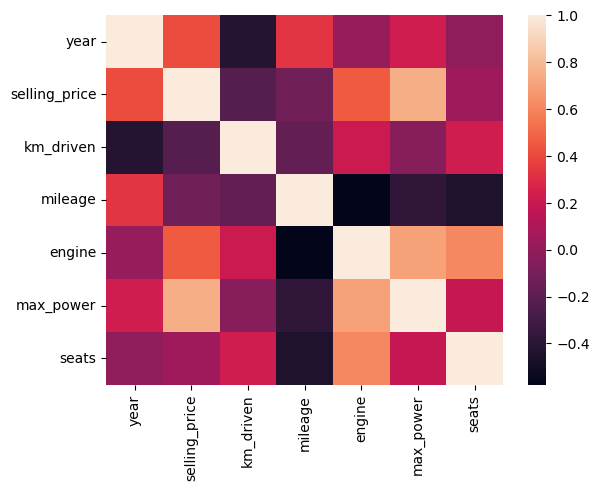

In [113]:
# heatmap
seaborn.heatmap(data=corr)
plt.show()

In [114]:
#category

In [115]:
# Anova testing (Analysis of variance)--> finding f_score of each column
from sklearn.feature_selection import f_classif, SelectKBest
# classif  ---- perform ing anova test and calculating the f score.
# seelctkbest-- use to select the top column important to the dependent column based on higghest f score
select=SelectKBest(f_classif,k=3)   #  k seelct top 3 highest column
columns=select.fit_transform(category,Numeric['selling_price'])
print(select.scores_)

[12.62413255  6.75369343  3.11360009 12.03066124  3.72407978]


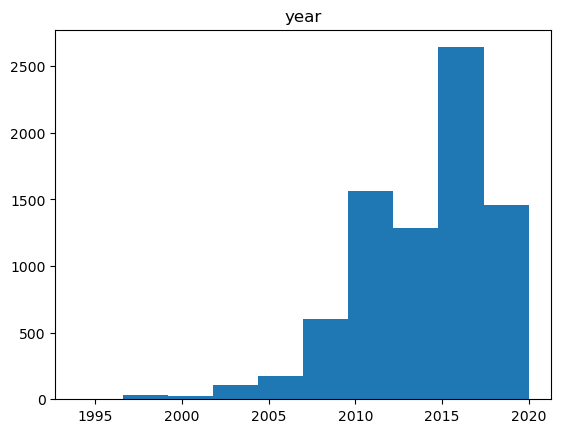

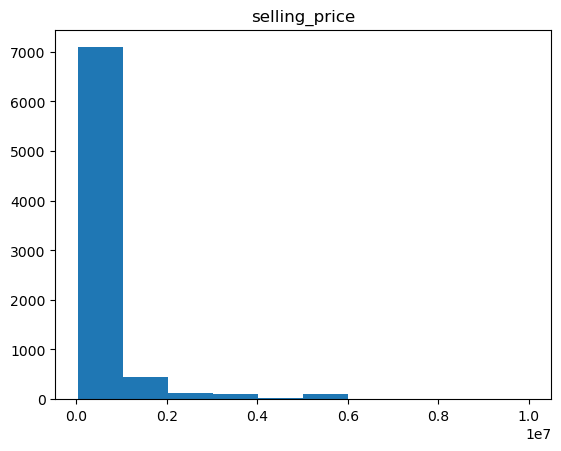

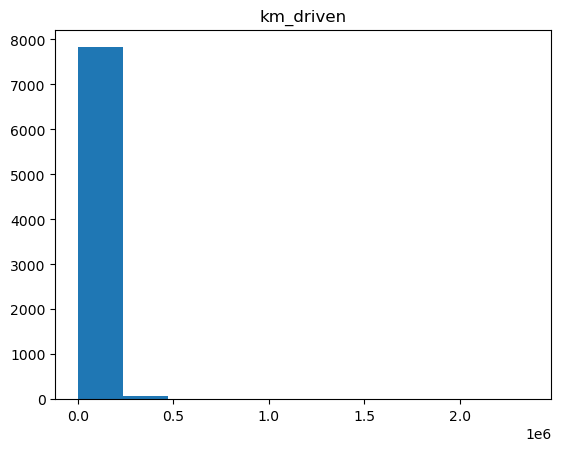

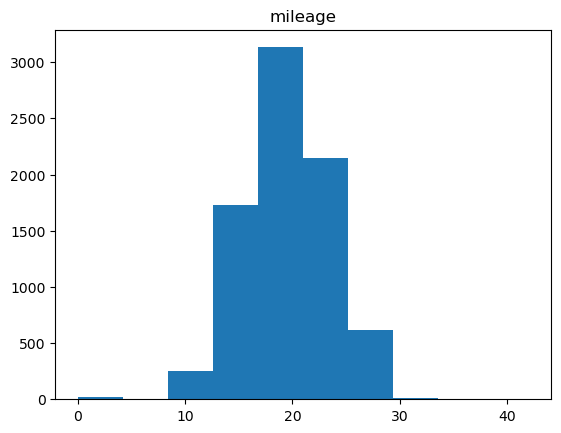

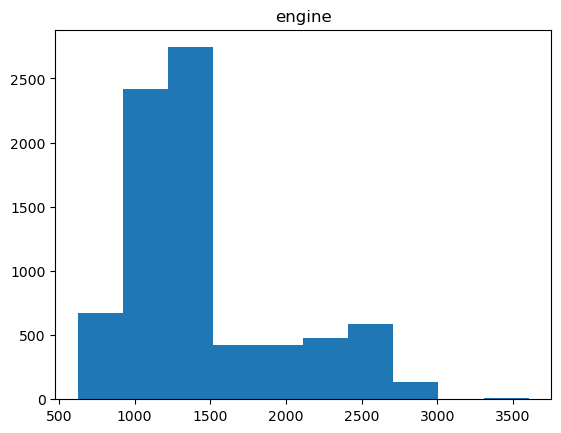

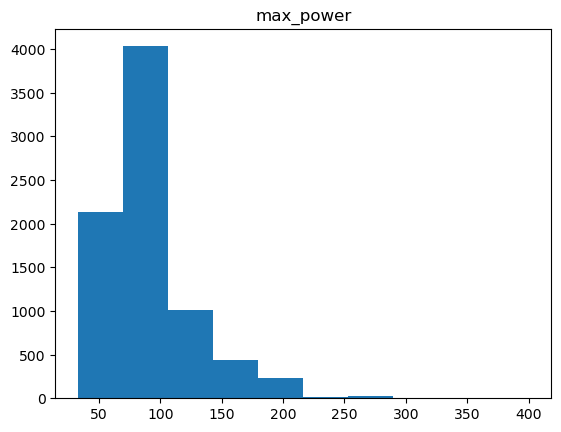

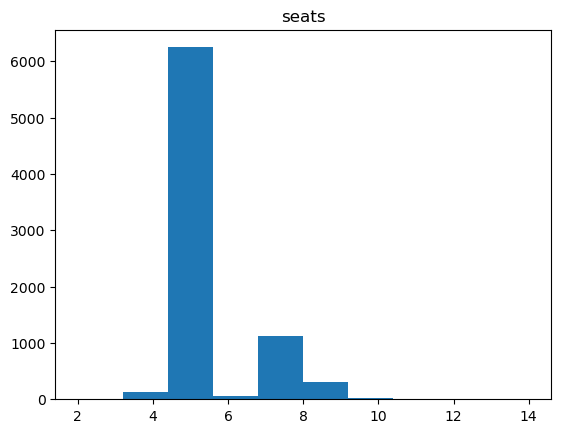

In [116]:
#  Topic : outlier detection
# make histogram of all columns  to check whether a normal or unknown distributed
for column in Numeric.columns:
    plt.hist(Numeric[column])
    plt.title(column)
    plt.show()

In [117]:
# detect outlier of km_driven   
import numpy as np
def detect(column):
    mean=column.mean()    
    Std=column.std() 
    z_score=(column-mean)/Std   # z score
    return column[(z_score>3) | (z_score<-3)] 
outlier=detect(Numeric['km_driven'])
print(outlier)

f=Numeric['km_driven'].isin(outlier)
Numeric=Numeric[~f]
category=category[~f]

outlier=detect(Numeric['mileage'])
f=Numeric['mileage'].isin(outlier)
Numeric=Numeric[~f]
category=category[~f]

outlier=detect(Numeric['max_power'])
f=Numeric['max_power'].isin(outlier)
Numeric=Numeric[~f]
category=category[~f]

Numeric=Numeric.reset_index(drop=True)
category=category.reset_index(drop=True)


380     240000
387     265000
447     250000
856     300000
1196    300000
         ...  
7423    250000
7719    250000
7743    250000
7802    300000
7848    250000
Name: km_driven, Length: 70, dtype: int64


In [118]:
# case : unknown distribution
# DBSCAN: density based spatial clustring of application with noise
# it create clusterrs : make groups which have same properties 
# It also hepls to detect the outliers
# DBSCAN : HAS two 
# 1. apsilon (radias)
# 2. min neighbour(m.n.)
# there are 3 points : 1. core point: which control contains no. of darta points in radias equal, or more 
# than min neighbour
# 2. border point 
# 3. noise point: when radias does not contain any point in circle



# 1. epsilon : radias around the data points 
# 2. min neighbour/ min sample--> monimum sample required to form a dense region 
# There are 3 types  of points in DBSCAN
# Core point--> there should atleast number of data points mentioned in the min neighbour 
#  border point  --> in circle there are points less than min neighbour
# noise point--> when no data pouints / min neighbour is present in the circle

In [119]:
# apply on engine due to unknown distribution
data=Numeric[['engine','selling_price']]
# here we apply min max scaling (data is fix  0 to 1)
from sklearn.preprocessing import MinMaxScaler  # minmax scaler
m=MinMaxScaler()
data=m.fit_transform(data)
data

array([[0.24242424, 0.07279046],
       [0.33954934, 0.05892564],
       [0.33916084, 0.02218388],
       ...,
       [0.24242424, 0.06100536],
       [0.2999223 , 0.04506082],
       [0.2999223 , 0.04506082]])

In [120]:
# unsupervised learning 
# apply DBSCAN algo
import numpy as np
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.06, min_samples=10)
dbscan.fit(data)
labels=dbscan.labels_
# print(np.unique(labels))
# label -1 ean that it consists of  all the noise points
print(np.unique(labels,return_index=True,return_counts=True))  # here return_index returns index of only last occuring outlier in engine


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([ 55,   0,  36,  44,  52, 125, 129, 329, 342], dtype=int64), array([  24, 6148, 1317,   55,   24,   41,   67,   12,   25], dtype=int64))


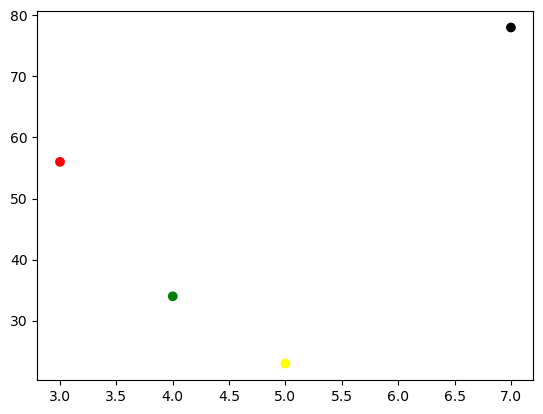

In [121]:
# to see the graph
l=[3,4,5,7]
l1=[56,34,23,78]  # w acn put numbers according to that number have same colour 
colors=['red','green','yellow','black']
plt.scatter(l,l1,c=colors)
plt.show()

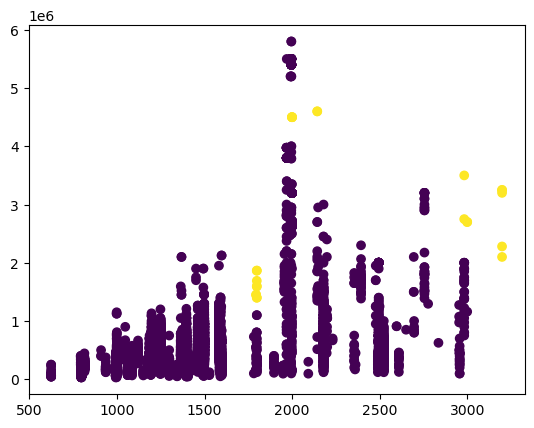

In [122]:
label=np.where(labels>-1,0,1)
# where --> np.where(condition,valueif true, value if false)
plt.scatter(Numeric['engine'],Numeric['selling_price'],c=label)
plt.show()

In [123]:
Numeric

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,2014,450000,145500,23.400000,1248.0,74.000000,5.0
1,2014,370000,120000,21.139999,1498.0,103.519997,5.0
2,2006,158000,140000,17.700001,1497.0,78.000000,5.0
3,2010,225000,127000,23.000000,1396.0,90.000000,5.0
4,2007,130000,120000,16.100000,1298.0,88.199997,5.0
...,...,...,...,...,...,...,...
7708,2013,320000,110000,18.500000,1197.0,82.849998,5.0
7709,2007,135000,119000,16.799999,1493.0,110.000000,5.0
7710,2009,382000,120000,19.299999,1248.0,73.900002,5.0
7711,2013,290000,25000,23.570000,1396.0,70.000000,5.0


In [124]:
# split data into dependent and independent  variables
y=Numeric['selling_price']
Numeric=Numeric.drop(columns=['selling_price'])
X=pd.concat((Numeric,category),axis=1)
X

,year,km_driven,mileage,engine,max_power,seats,name,seller_type,fuel,transmission,owner
0,2014,145500,23.400000,1248.0,74.000000,5.0,1,0,1,0,0
1,2014,120000,21.139999,1498.0,103.519997,5.0,1,0,1,0,1
2,2006,140000,17.700001,1497.0,78.000000,5.0,1,0,0,0,2
3,2010,127000,23.000000,1396.0,90.000000,5.0,1,0,1,0,0
4,2007,120000,16.100000,1298.0,88.199997,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7708,2013,110000,18.500000,1197.0,82.849998,5.0,1,0,0,0,0
7709,2007,119000,16.799999,1493.0,110.000000,5.0,1,0,1,0,3
7710,2009,120000,19.299999,1248.0,73.900002,5.0,1,0,1,0,0
7711,2013,25000,23.570000,1396.0,70.000000,5.0,1,0,1,0,0


In [125]:
# help(OneHotEncoder)

In [126]:
# one Hot encoding
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('encode',OneHotEncoder(sparse_output=False),[7,8])],remainder='passthrough')
X=ct.fit_transform(X)
X.shape

(7713, 15)

In [127]:
# standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041, -0.63003059],
       [ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041,  0.7937684 ],
       [ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041,  2.2175674 ],
       ...,
       [ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041, -0.63003059],
       [ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041, -0.63003059],
       [ 0.44669166, -0.39631516, -0.17766109, ..., -0.01400896,
        -0.37254041, -0.63003059]])

In [128]:
# Spliting 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(6170, 15)
(1543, 15)


In [129]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9725791048375667
